In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat
from scipy.optimize import minimize

In [4]:
data = loadmat('data/ex8_movies.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Thu Dec  1 17:19:26 2011',
 '__version__': '1.0',
 '__globals__': [],
 'Y': array([[5, 4, 0, ..., 5, 0, 0],
        [3, 0, 0, ..., 0, 0, 5],
        [4, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'R': array([[1, 1, 0, ..., 1, 0, 0],
        [1, 0, 0, ..., 0, 0, 1],
        [1, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [5]:
Y = data['Y']
R = data['R']
Y.shape, R.shape

((1682, 943), (1682, 943))

In [6]:
Y[1, np.where(R[1, :]==1)[0]].mean() #以第一部电影为例

3.2061068702290076

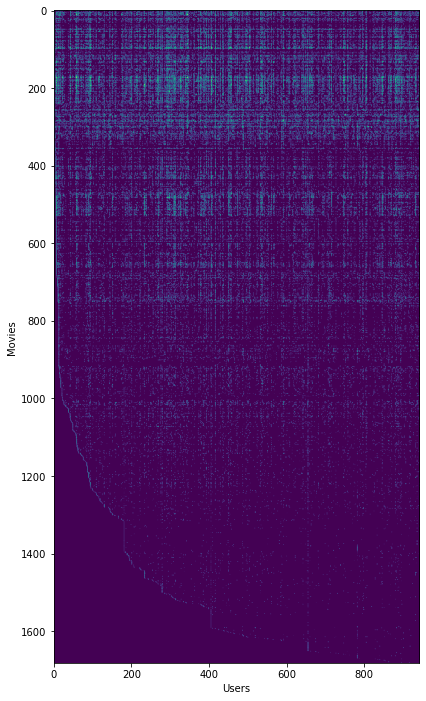

In [7]:
fig, ax = plt.subplots(figsize = (12, 12))
ax.imshow(Y)
ax.set_xlabel('Users')
ax.set_ylabel('Movies')
plt.show()

In [22]:
def cost(params, Y, R, num_features):
    Y = np.matrix(Y)
    R = np.matrix(R)
    num_m = Y.shape[0]
    num_u = Y.shape[1]

    #reshape array into matrices
    X = np.matrix(np.reshape(params[:num_m * num_features], (num_m, num_features))) #(1682, 10)
    Theta = np.matrix(np.reshape(params[num_m * num_features:], (num_u, num_features))) #(943, 10)

    #initializations
    J = 0
    # X_grad = np.zeros(X.shape)
    # Theta_grad = np.zeros(Theta.shape)

    #compute the cost
    error = np.multiply((X * Theta.T) - Y, R)
    squared_error = np.power(error, 2)
    J = (1 / 2) * np.sum(squared_error)

    print(error.shape)

    return J

In [23]:
params_data = loadmat('data/ex8_movieParams.mat')
X = params_data['X']
Theta = params_data['Theta']
X.shape, Theta.shape

((1682, 10), (943, 10))

In [24]:
#提取少量数据进行计算

users = 4
movies = 5
features = 3

X_sub = X[:movies, :features]
Theta_sub = Theta[:users, :features]
Y_sub = Y[:movies, :users]
R_sub = R[:movies, :users]

params = np.concatenate((np.ravel(X_sub), np.ravel(Theta_sub)))

cost(params, Y_sub, R_sub, features)


(5, 4)


22.224603725685675

In [25]:
def cost(params, Y, R, num_features):
    Y = np.matrix(Y)
    R = np.matrix(R)
    num_m = Y.shape[0]
    num_u = Y.shape[1]

    #reshape array into matrices
    X = np.matrix(np.reshape(params[:num_m * num_features], (num_m, num_features))) #(1682, 10)
    Theta = np.matrix(np.reshape(params[num_m * num_features:], (num_u, num_features))) #(943, 10)

    #initializations
    J = 0
    X_grad = np.zeros(X.shape)
    Theta_grad = np.zeros(Theta.shape)

    #compute the cost
    error = np.multiply((X * Theta.T) - Y, R)
    squared_error = np.power(error, 2)
    J = (1 / 2) * np.sum(squared_error)

    #calculate the gradients
    X_grad = error * Theta
    Theta_grad = error.T * X

    #unravel the gradient matrix into a single array
    grad = np.concatenate((np.ravel(X_grad), np.ravel(Theta_grad)))

    return J, grad

In [26]:
J, grad = cost(params, Y_sub, R_sub, features)
J, grad

(22.224603725685675,
 array([ -2.52899165,   7.57570308,  -1.89979026,  -0.56819597,
          3.35265031,  -0.52339845,  -0.83240713,   4.91163297,
         -0.76677878,  -0.38358278,   2.26333698,  -0.35334048,
         -0.80378006,   4.74271842,  -0.74040871, -10.5680202 ,
          4.62776019,  -7.16004443,  -3.05099006,   1.16441367,
         -3.47410789,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ]))

In [27]:
def cost(params, Y, R, num_features, alpha):
    Y = np.matrix(Y)
    R = np.matrix(R)
    num_m = Y.shape[0]
    num_u = Y.shape[1]

    #reshape array into matrices
    X = np.matrix(np.reshape(params[:num_m * num_features], (num_m, num_features))) #(1682, 10)
    Theta = np.matrix(np.reshape(params[num_m * num_features:], (num_u, num_features))) #(943, 10)

    #initializations
    J = 0
    X_grad = np.zeros(X.shape)
    Theta_grad = np.zeros(Theta.shape)

    #compute the cost
    error = np.multiply((X * Theta.T) - Y, R)
    squared_error = np.power(error, 2)
    J = (1 / 2) * np.sum(squared_error)

    #add the cost regulation
    J = J + ((alpha / 2) * np.sum(np.power(Theta, 2)))
    J = J + ((alpha / 2) * np.sum(np.power(X, 2)))

    #calculate the gradients
    X_grad = error * Theta
    Theta_grad = error.T * X

    #unravel the gradient matrix into a single array
    grad = np.concatenate((np.ravel(X_grad), np.ravel(Theta_grad)))

    return J, grad

In [29]:
J, grad = cost(params, Y_sub, R_sub, features, 1.5)
J, grad

(31.34405624427422,
 array([ -2.52899165,   7.57570308,  -1.89979026,  -0.56819597,
          3.35265031,  -0.52339845,  -0.83240713,   4.91163297,
         -0.76677878,  -0.38358278,   2.26333698,  -0.35334048,
         -0.80378006,   4.74271842,  -0.74040871, -10.5680202 ,
          4.62776019,  -7.16004443,  -3.05099006,   1.16441367,
         -3.47410789,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ]))

In [31]:
movie_idx = {}
f = open('data/movie_ids.txt', encoding='gbk')
for line in f:
    tokens = line.split(' ')
    tokens[-1] = tokens[-1][:-1]
    movie_idx[int(tokens[0]) - 1] = ' '.join(tokens[1:])

In [32]:
movie_idx[0]

'Toy Story (1995)'

In [33]:
ratings = np.zeros((1682, 1))

ratings[0] = 4
ratings[6] = 3
ratings[11] = 5
ratings[53] = 4
ratings[63] = 5
ratings[65] = 3
ratings[68] = 5
ratings[97] = 2
ratings[182] = 4
ratings[225] = 5
ratings[354] = 5

print('Rated {0} with {1} stars.'.format(movie_idx[0], str(int(ratings[0]))))
print('Rated {0} with {1} stars.'.format(movie_idx[6], str(int(ratings[6]))))
print('Rated {0} with {1} stars.'.format(movie_idx[11], str(int(ratings[11]))))
print('Rated {0} with {1} stars.'.format(movie_idx[53], str(int(ratings[53]))))
print('Rated {0} with {1} stars.'.format(movie_idx[63], str(int(ratings[63]))))
print('Rated {0} with {1} stars.'.format(movie_idx[65], str(int(ratings[65]))))
print('Rated {0} with {1} stars.'.format(movie_idx[68], str(int(ratings[68]))))
print('Rated {0} with {1} stars.'.format(movie_idx[97], str(int(ratings[97]))))
print('Rated {0} with {1} stars.'.format(movie_idx[182], str(int(ratings[182]))))
print('Rated {0} with {1} stars.'.format(movie_idx[225], str(int(ratings[225]))))
print('Rated {0} with {1} stars.'.format(movie_idx[354], str(int(ratings[354]))))

Rated Toy Story (1995) with 4 stars.
Rated Twelve Monkeys (1995) with 3 stars.
Rated Usual Suspects, The (1995) with 5 stars.
Rated Outbreak (1995) with 4 stars.
Rated Shawshank Redemption, The (1994) with 5 stars.
Rated While You Were Sleeping (1995) with 3 stars.
Rated Forrest Gump (1994) with 5 stars.
Rated Silence of the Lambs, The (1991) with 2 stars.
Rated Alien (1979) with 4 stars.
Rated Die Hard 2 (1990) with 5 stars.
Rated Sphere (1998) with 5 stars.


In [34]:
R = data['R']
Y = data['Y']

Y = np.append(Y, ratings, axis=1)
R = np.append(R, ratings != 0, axis=1)

Y.shape, R.shape, ratings.shape

((1682, 944), (1682, 944), (1682, 1))

In [35]:
movies = Y.shape[0]
users = Y.shape[1]
features = 10
alpha = 10

X = np.random.random(size=(movies, features))
Theta = np.random.random(size=(users, features))
params = np.concatenate((np.ravel(X), np.ravel(Theta)))

X.shape, Theta.shape, params.shape

((1682, 10), (944, 10), (26260,))

In [38]:
Ymean = np.zeros((movies, 1))
Ynorm = np.zeros((movies, users))

for i in range(movies):
    idx = np.where(R[i, :] == 1)[0]
    Ymean[i] = Y[i, idx].mean()
    Ynorm[i, idx] = Y[i, idx] - Ymean[i]

Ynorm.mean()

5.507036456515984e-19

In [46]:
fmin = minimize(fun=cost, x0=params, args=(Ynorm, R, features, alpha), jac=True, method='CG', options={'maxiter':100})
fmin

     fun: 56315.17065776164
     jac: array([ 4.17260797,  5.30383016,  3.78211274, ..., -0.03495774,
        0.15478575, -0.393761  ])
 message: 'Desired error not necessarily achieved due to precision loss.'
    nfev: 146
     nit: 19
    njev: 134
  status: 2
 success: False
       x: array([ 0.45868426,  0.1140548 ,  0.34524277, ..., -0.0545214 ,
        0.78601854,  0.9508424 ])

In [47]:
X = np.matrix(np.reshape(fmin.x[:movies * features], (movies, features)))
Theta = np.matrix(np.reshape(fmin.x[movies * features:], (users, features)))

X.shape, Theta.shape

((1682, 10), (944, 10))

In [48]:
predictions = X * Theta.T
my_preds = predictions[:, -1] + Ymean
my_preds.shape

(1682, 1)

In [49]:
sorted_preds = np.sort(my_preds, axis=0)[::-1]
sorted_preds[:10]

matrix([[7.90802457],
        [7.61249662],
        [7.43454308],
        [7.42537445],
        [7.17470693],
        [7.15076328],
        [7.03358414],
        [6.82669226],
        [6.72303639],
        [6.7186287 ]])

In [50]:
idx = np.argsort(my_preds, axis=0)[::-1]
idx[:10]

matrix([[1188],
        [1535],
        [1200],
        [1641],
        [1121],
        [1466],
        [1598],
        [1499],
        [1292],
        [1491]], dtype=int64)